# Support Vector Regression (SVR)

## Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [30]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [31]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [32]:
y = y.reshape(len(y),1) #transformar num array vertical, como estao os niveis.
#necessario para a standardscale class, que recebe um array 2D

In [33]:
print(y) #para ver se ja ficou ok. Feito - sai um array 2D

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [34]:
#Vamos fazer feature scaling a TUDO. X e Y. So se faz no SVR porque n temos uma
#equacao com coeficientes relacionados com as features (linear models).
#a feature "Level" tem numeros tao baixos que podera ser negada pelos salarios
#altos. Portanto precisamos de feature scaling para tudo.
#Feature scaling n se aplica em:
# one hot encoding, variaveis binarias, etc. Quando se faz split de dados - aplicar depois.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #criar objetos da classe standardscaler
sc_y = StandardScaler()
X = sc_X.fit_transform(X) #aplicar a X e a y
y = sc_y.fit_transform(y)

In [35]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [36]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [37]:
from sklearn.svm import SVR #SVR do Skicit Learn SVM (Support Vector Model)
regressor = SVR(kernel = 'rbf') #kernels - linear or non linear relationships. Guass RBF Kernel é non linear
#Radial Basis Function (RBF) Kernel é o recomendado para SVR
#Apos termos o modelo, falta treinar o regressor na whole dataset
regressor.fit(X, y) #fit function - treina! Vê as correlacoes entre as features.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [38]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)) #temos que aplicar o scaler também ao 6.5 pois já tinhamos scaled os dados.
#Importa depois fazer um rescale para um valor real inicial.
#INVERSE TRANSFORM
#reshape para dar um valor. Deu 170k --> faz sentido.

array([[170370.0204065]])

## Visualising the SVR results

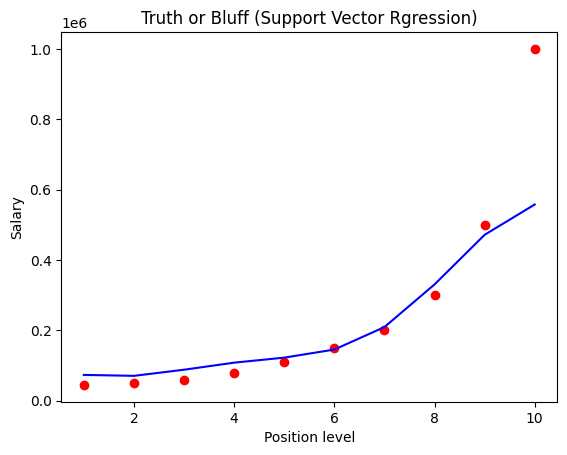

In [39]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red') #mostrar dados reais, aplicando o scaler inverso
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue') #mostrar regressao linear aplicada a X. cor blue
plt.title('Truth or Bluff (Support Vector Rgression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipython-input-40-1412826726.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


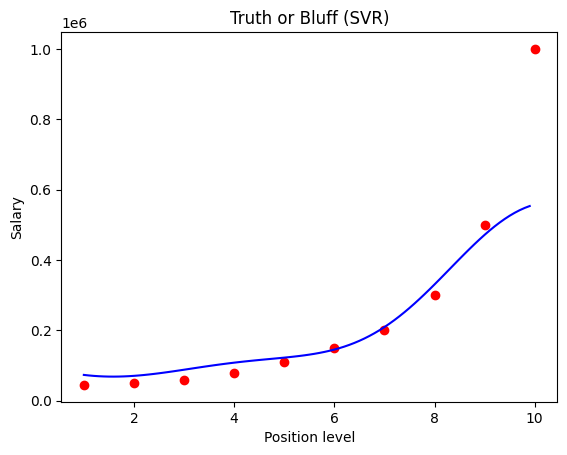

In [40]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()